In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

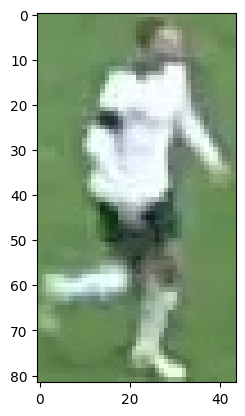

In [ ]:
#open image
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

top half of image 

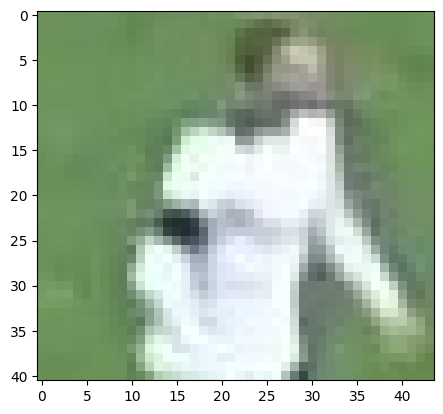

In [ ]:
top_half_image = image[0:int(image.shape[0]/2), : ]
plt.imshow(top_half_image)
plt.show()

cluster the image into two clusters

<function matplotlib.pyplot.show(close=None, block=None)>

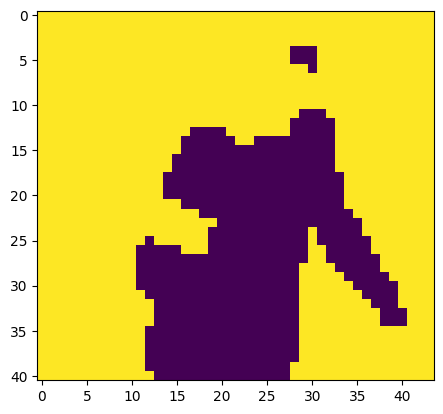

In [ ]:
#reshape image in 2d array
image_2d = top_half_image.reshape(-1,3)

#perform kmeans with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)


#get the labels
labels = kmeans.labels_

#reshape image back to 2d 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show

In [ ]:
#to get your dseired player cluster get the corner clusters which indciate not your player
corner_clusters = [clustered_image[0,0] , clustered_image[0,-1],clustered_image[-1,0] , clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [ ]:
player_cluster = 1- non_player_cluster
print(player_cluster)

0


In [ ]:
#centre that is the clsuter which is the player color and it gives the rgb color
kmeans.cluster_centers_[player_cluster]

array([224.16635161, 235.27410208, 235.37240076])